In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies/movies.csv


In [44]:
df = pd.read_csv("/kaggle/input/movies/movies.csv")

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [46]:
df = pd.read_csv("/kaggle/input/movies/movies.csv")

In [47]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [48]:
# Checking for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [49]:
# Data types of the columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [ ]:
df=['yearcorrect']= df['released'].astype(str).str[:4]
df


In [ ]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

In [ ]:
pd.set_option('display.max_rows', None)

In [51]:
# Drop any duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

<function matplotlib.pyplot.show(close=None, block=None)>

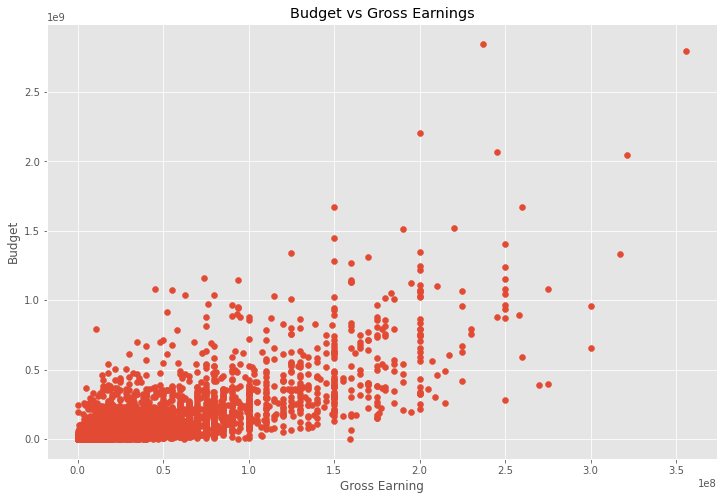

In [53]:
# Scatter plot with budget and gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earning')
plt.ylabel('Budget')
plt.show

<AxesSubplot:xlabel='score', ylabel='gross'>

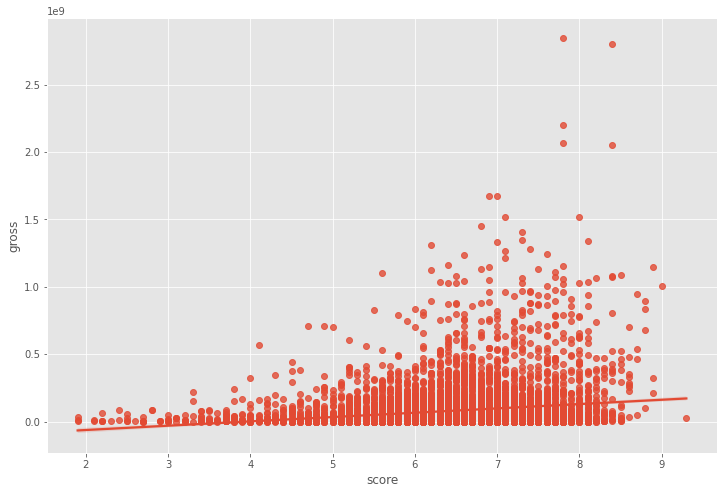

In [55]:
sns.regplot(x="score", y="gross", data=df)

In [ ]:
# Correlation

In [60]:
df.corr(method='pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000

In [ ]:
# High Correlation between Budget and Gross

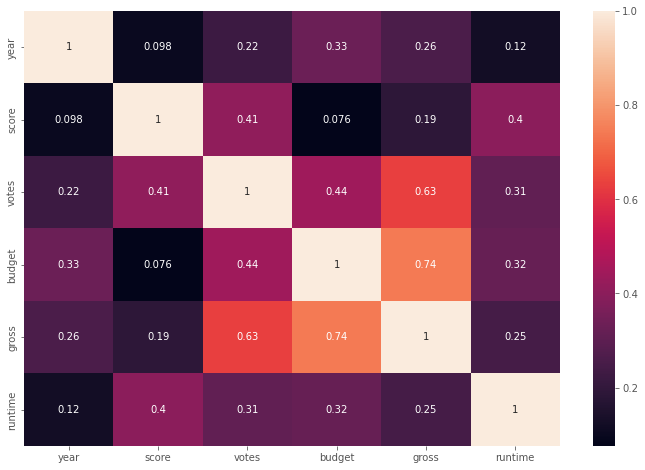

In [61]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.show()

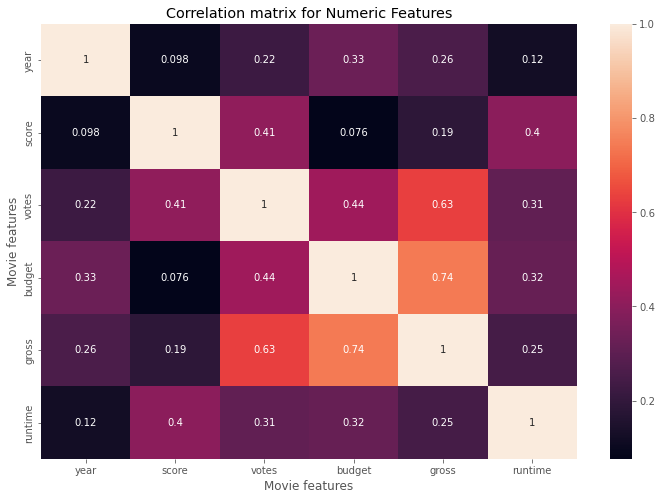

In [62]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [64]:
df

name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG     Action   
11                               The Gods Must Be Crazy         PG  Adventure   
12                                               Popeye         PG  Adventure   
13                                      Ordinary People          R      Drama   
14                                      Dressed to Kill          R      Crime   
15                                    Somewhere in Time         PG      Drama   
16                                                 Fame          R      Drama   
17                                               9 to 5         PG     Comedy   
18                                              The Fog          R     Horror   
19                                           Stir Crazy          R     Comedy   
20                                             Cruising          R      Crime   
21                                        Heaven's Gate          R  Adventure   
22                                  The Final Countdown         PG     Action   
23                                               Xanadu         PG    Fantasy   
24                                         Urban Cowboy         PG      Drama   
25                                       Altered States          R     Horror   
26                                      Little Darlings          R     Comedy   
27                                    Raise the Titanic         PG     Action   
28                                             Brubaker          R      Crime   
29                                      American Gigolo          R      Crime   
30                                         My Bodyguard         PG     Comedy   
31                                           Prom Night          R     Horror   
32                             Smokey and the Bandit II         PG     Action   
33                     Cattle Annie and Little Britches         PG      Drama   
34                                 Seems Like Old Times         PG     Comedy   
35                                     Private Benjamin          R     Comedy   
36                                The Hollywood Knights          R     Comedy   
37                                           Motel Hell          R     Comedy   
38                                      The Jazz Singer         PG      Drama   
39                                Coal Miner's Daughter         PG  Biography   
40                             The Watcher in the Woods         PG     Family   
41                                       Breaker Morant         PG      Drama   
42                                        The Stunt Man          R     Action   
43                               Where the Buffalo Roam          R  Biography   
44                                        The Awakening          R     Horror   
45                        Cheech and Chong's Next Movie          R     Comedy   
46                                           The Island          R     Action   
47                                       The Boogey Man          R     Horror   
48                                        The Nude Bomb         PG     Action   
4

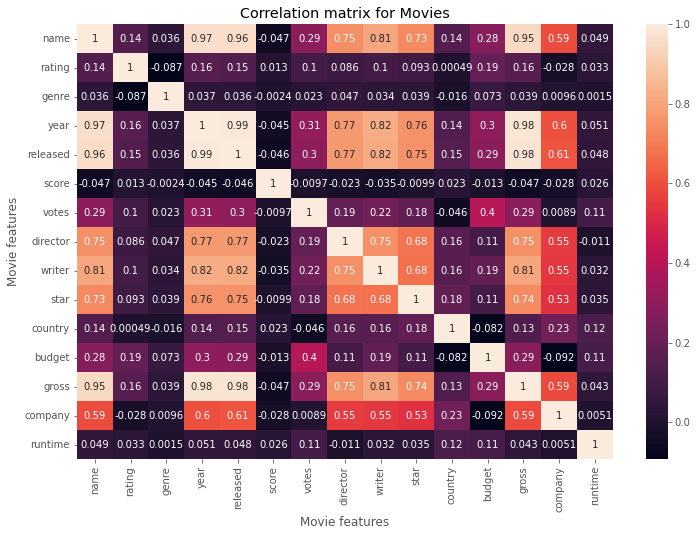

In [65]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [66]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name      name        1.000000
          rating      0.143938
          genre       0.036367
          year        0.965761
          released    0.959015
          score      -0.046733
          votes       0.287776
          director    0.745905
          writer      0.805211
          star        0.731565
          country     0.142828
          budget      0.277488
          gross       0.947324
          company     0.591667
          runtime     0.048955
rating    name        0.143938
          rating      1.000000
          genre      -0.086723
          year        0.156713
          released    0.146606
          score       0.012595
          votes       0.099972
          director    0.085520
          writer      0.103623
          star        0.093116
          country     0.000494
          budget      0.193353
          gross       0.158582
          company    -0.028035
          runtime     0.032741
genre     name        0.036367
          rating     -0.086723
        

In [67]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

budget    company    -0.092249
company   budget     -0.092249
genre     rating     -0.086723
rating    genre      -0.086723
budget    country    -0.082082
country   budget     -0.082082
gross     score      -0.047041
score     gross      -0.047041
          name       -0.046733
name      score      -0.046733
votes     country    -0.045914
country   votes      -0.045914
released  score      -0.045761
score     released   -0.045761
year      score      -0.044981
score     year       -0.044981
writer    score      -0.034685
score     writer     -0.034685
company   score      -0.028432
score     company    -0.028432
company   rating     -0.028035
rating    company    -0.028035
director  score      -0.022687
score     director   -0.022687
genre     country    -0.015795
country   genre      -0.015795
score     budget     -0.012642
budget    score      -0.012642
runtime   director   -0.011070
director  runtime    -0.011070
score     star       -0.009896
star      score      -0.009896
score   

In [ ]:
# Company has low correlation